# Dog and Cat classifier

In [30]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
path1 = r"E:\dogcat"     # this is address of dog cat folder
cate = ['dog','cat']

In [32]:
for i in cate:
    folders = os.path.join(path1,i)
    print(folders)

E:\dogcat\dog
E:\dogcat\cat


In [33]:
# it will enter dogcat folder and then dog folder and read all images in side the dog folder and come out of dog folder
# and enter cat folder and read all images of cat folder

for i in cate:
    folders = os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        print(image_path)

E:\dogcat\dog\dog1.PNG
E:\dogcat\dog\dog10.PNG
E:\dogcat\dog\dog11.PNG
E:\dogcat\dog\dog12.PNG
E:\dogcat\dog\dog13.PNG
E:\dogcat\dog\dog14.PNG
E:\dogcat\dog\dog15.PNG
E:\dogcat\dog\dog2.png
E:\dogcat\dog\dog3.PNG
E:\dogcat\dog\dog4.PNG
E:\dogcat\dog\dog5.PNG
E:\dogcat\dog\dog6.PNG
E:\dogcat\dog\dog7.PNG
E:\dogcat\dog\dog8.PNG
E:\dogcat\dog\dog9.PNG
E:\dogcat\cat\cat1.png
E:\dogcat\cat\cat10.PNG
E:\dogcat\cat\cat11.PNG
E:\dogcat\cat\cat12.PNG
E:\dogcat\cat\cat13.PNG
E:\dogcat\cat\cat14.PNG
E:\dogcat\cat\cat15.PNG
E:\dogcat\cat\cat2.png
E:\dogcat\cat\cat3.PNG
E:\dogcat\cat\cat4.PNG
E:\dogcat\cat\cat5.PNG
E:\dogcat\cat\cat6.PNG
E:\dogcat\cat\cat7.PNG
E:\dogcat\cat\cat8.PNG
E:\dogcat\cat\cat9.PNG


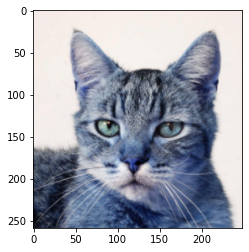

In [34]:
# just to see image have been read or not

for i in cate:
    folders = os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        break

In [35]:
# this is hole code no need to run above code

image_size = 200

path1 = r"E:\dogcat"     # this is address of dog cat folder
cate = ['dog','cat']

input_image = []

for i in cate:
    folders = os.path.join(path1, i)
    label = cate.index(i)                    # we need to tell software which image is of cat and which is of dog
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)       #  using the cv2 i am reading the image and storing in variable image_array
        image_array = cv2.resize(image_array, (image_size, image_size))   # resizing each image to 200 *200
        input_image.append([image_array, label])
        

In [36]:
len(input_image)

30

In [37]:
# to see image pixel (0-means dog images),(1 - means cat images)

In [38]:
input_image[1]

[array([[[158, 156, 148],
         [156, 157, 148],
         [154, 156, 148],
         ...,
         [ 60,  89,  80],
         [ 69, 106,  94],
         [ 75, 119, 104]],
 
        [[158, 156, 148],
         [158, 156, 148],
         [157, 156, 147],
         ...,
         [ 59,  92,  82],
         [ 69, 115, 104],
         [ 71, 117, 104]],
 
        [[160, 157, 150],
         [159, 157, 149],
         [157, 155, 147],
         ...,
         [ 65, 113, 102],
         [ 67, 117, 105],
         [ 70, 117, 105]],
 
        ...,
 
        [[199, 205, 212],
         [194, 199, 210],
         [185, 188, 203],
         ...,
         [215, 225, 236],
         [217, 226, 235],
         [223, 227, 231]],
 
        [[196, 202, 209],
         [191, 196, 205],
         [184, 188, 200],
         ...,
         [198, 207, 217],
         [211, 218, 228],
         [222, 227, 230]],
 
        [[193, 199, 206],
         [191, 197, 205],
         [191, 197, 205],
         ...,
         [182, 189, 198],
  

In [39]:
input_image[20]

[array([[[ 22,  47,  87],
         [ 22,  46,  88],
         [ 21,  47,  89],
         ...,
         [ 24,  53, 127],
         [ 22,  52, 124],
         [ 24,  53, 127]],
 
        [[ 21,  46,  86],
         [ 22,  46,  88],
         [ 22,  46,  88],
         ...,
         [ 25,  54, 128],
         [ 25,  55, 126],
         [ 25,  54, 127]],
 
        [[ 19,  45,  85],
         [ 20,  45,  87],
         [ 22,  45,  88],
         ...,
         [ 28,  47,  96],
         [ 28,  48,  98],
         [ 27,  49, 107]],
 
        ...,
 
        [[ 20,  31,  59],
         [ 19,  30,  58],
         [ 19,  30,  58],
         ...,
         [ 18,  23,  44],
         [ 17,  22,  43],
         [ 16,  22,  41]],
 
        [[ 20,  31,  59],
         [ 20,  31,  59],
         [ 19,  30,  58],
         ...,
         [ 18,  22,  44],
         [ 18,  21,  43],
         [ 16,  21,  41]],
 
        [[ 21,  32,  60],
         [ 20,  31,  59],
         [ 19,  30,  58],
         ...,
         [ 21,  21,  45],
  

In [11]:
# all dog and cat images are together so it is not good for model building and sampling
# so need to shuffle the data

In [40]:
np.random.shuffle(input_image)

In [41]:
X = []
Y = []

In [42]:
for X_values, labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [43]:
X = np.array(X)
Y = np.array(Y)

In [44]:
len(X)

30

In [45]:
len(Y)

30

In [46]:
X = X/255   # divide by 255 as highest value any pixel can take

In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [48]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', ))
model.add(MaxPool2D(pool_size = (2,2)))      # 1 pair of conv and pooling

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', ))
model.add(MaxPool2D(pool_size = (2,2)))       # 2nd pair  of conv and pooling ....stacked on 1st pair
model.add(Flatten())

model.add(Dense(128, activation = 'relu', input_shape = X.shape[1:]))

model.add(Dense(2, activation = 'softmax'))


In [49]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [50]:
model.fit(X, Y, epochs = 20)

Epoch 1/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.4000
Epoch 2/20
1/1 [==============================] - 0s 2ms/step - loss: 1.8255 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 2ms/step - loss: 3.9245 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 2ms/step - loss: 2.5239 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.5333
Epoch 6/20
1/1 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.5667
Epoch 7/20
1/1 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.5000
Epoch 8/20
1/1 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.7000
Epoch 9/20
1/1 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8667
Epoch 11/20
1/1 [======================

In [51]:
pred = model.predict_classes(X)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

0 - Means Dog Images And 1 - Means cat images

In [52]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [53]:
confusion_matrix(pred, Y)

array([[15,  0],
       [ 0, 15]], dtype=int64)

In [54]:
print(accuracy_score(pred,Y))

1.0


In [28]:
print(classification_report(pred,Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Conclustion - So here we can this model is perfectly identifying the Dog and cat images with 100 percent Accuracy.